# Working with Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [2]:
df=pd.read_table(r"/content/Restaurant_Reviews.tsv")

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
df['Liked'].nunique()

2

In [8]:
print(df['Liked'].unique())

[1 0]


In [9]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [10]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


# Visualizations

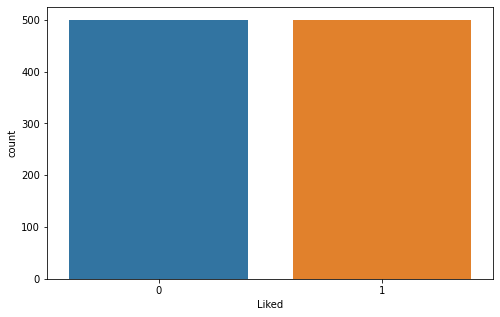

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked)

In [13]:
x=df['Review'].values
y=df['Liked'].values

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [15]:
x_train.shape

(750,)

In [16]:
x_test.shape

(250,)

In [17]:
y_train.shape

(750,)

In [18]:
y_test.shape

(250,)

# Import CountVectorizer and SVC


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [20]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [21]:
from sklearn.svm import SVC
model=SVC()

In [22]:
model.fit(x_train_vect,y_train)

SVC()

In [23]:
y_pred=model.predict(x_test_vect)

In [24]:
Negative = df[df.Liked ==0]
Positive = df[df.Liked==1]
Negative_text = " ".join(Negative.Review.to_numpy().tolist())
Positive_text = " ".join(Positive.Review.to_numpy().tolist())

In [25]:
print(Negative_text)

Crust is not good. Not tasty and the texture was just nasty. Now I am getting angry and I want my damn pho. Honeslty it didn't taste THAT fresh.) The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. Would not go back. The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. I was disgusted because I was pretty sure that was human hair. I was shocked because no signs indicate cash only. Waitress was a little slow in service. This place is not worth your time, let alone Vegas. did not like at all. The Burrittos Blah! - They never brought a salad we asked for. Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed. The worst was the salmon sashimi. This was like the final blow! seems like a good quick place to grab a bite of some familiar pub food, but do yourself a favor and look elsewhere. Poor service

In [26]:
print(Positive_text)

Wow... Loved this place. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. The fries were great too. A great touch. Service was very prompt. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! Highly recommended. The food, amazing. Service is also cute. I could care less... The interior is just beautiful. So they performed. That's right....the red velvet cake.....ohhh this stuff is so good. This hole in the wall has great Mexican street tacos, and friendly staff. Also there are combos like a burger, fries, and beer for 23 which is a decent deal. I found this place by accident and I could not be happier. Overall, I like this place a lot. The only redeeming quality of the restaurant was that it was very inexpensive. Ample portions and good prices. My first visit to Hiro was a delight! The shrimp tender and moist. On a positive note, our server was very attentive and provided great s

In [27]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
print(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(corpus).toarray()
Y = df.iloc[:, -1].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

# positive review

In [30]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


# negative review

In [31]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


# Creating SVC(Support vector classifier) Model

In [32]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Support Vector Classifier Model is ', accuracy_score(Y_test, Y_pred))
print('\n','Confusion_Matrix:' '\n', confusion_matrix(Y_test,Y_pred))
print('\n', '\n','Report:' '\n',classification_report(Y_test,Y_pred))

Accuracy of NLP Support Vector Classifier Model is  0.73

 Confusion_Matrix:
 [[54 43]
 [11 92]]

 
 Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67        97
           1       0.68      0.89      0.77       103

    accuracy                           0.73       200
   macro avg       0.76      0.72      0.72       200
weighted avg       0.75      0.73      0.72       200



# Creating NLP pipeline Model

In [33]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(CountVectorizer(),SVC())


In [34]:
text_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [35]:
y_pred=text_model.predict(x_test)

In [36]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

# Creating a Naive Bayes Model

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP NB Model is ', accuracy_score(Y_test, Y_pred))
print('\n','Confusion_Matrix:' '\n', confusion_matrix(Y_test,Y_pred))
print('\n', '\n','Report:' '\n',classification_report(Y_test,Y_pred))

Accuracy of NLP NB Model is  0.73

 Confusion_Matrix:
 [[54 43]
 [11 92]]

 
 Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67        97
           1       0.68      0.89      0.77       103

    accuracy                           0.73       200
   macro avg       0.76      0.72      0.72       200
weighted avg       0.75      0.73      0.72       200



# Creating NLP pipeline for the multinomialNB and CountVectorizer

In [38]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [39]:
X = df['Review']
Y = df['Liked']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=0)
# May take some time
pipeline.fit(X_train,Y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Pipeline Model is ', accuracy_score(Y_test, predictions))
print('\n','Confusion Matrix:' '\n', confusion_matrix(Y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(Y_test,predictions))

Accuracy of NLP Pipeline Model is  0.79

 Confusion Matrix:
 [[77 20]
 [22 81]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79        97
           1       0.80      0.79      0.79       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



In [40]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import  TfidfTransformer
pipeline_SVC = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ Support Vector classifier
])
pipeline_SVC.fit(X_train,Y_train)
predictions_SVC = pipeline_SVC.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of NLP Pipeline Model with SVC is ', accuracy_score(Y_test, predictions_SVC))
print('\n','Confusion Matrix:' '\n', confusion_matrix(Y_test,predictions_SVC))
print('\n', '\n','Classification Report:' '\n',classification_report(Y_test,predictions_SVC))

Accuracy of NLP Pipeline Model with SVC is  0.81

 Confusion Matrix:
 [[82 15]
 [23 80]]

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        97
           1       0.84      0.78      0.81       103

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



# Saving the Model

In [41]:
import joblib
joblib.dump(pipeline_SVC,'Project')

['Project']

# Loading the Model

In [42]:
import joblib
text_model=joblib.load('Project')

In [43]:
text_model.predict(['hello!!Love Your Food'])

array([1])

In [44]:
text_model.predict(["omg!!it was too spice and i asked you don't add too much "])

array([0])

# Creating Streamlit Webapp

In [45]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(text_model, pickle_out) 
pickle_out.close()

In [46]:
!pip install streamlit
!pip install pyngrok
!ngrok authtoken 27bxZx82lYjGlSpMaY7nvx9IGiX_4A2SyWU1MCRcwNFNsqoLy

     |████████████████████████████████| 10.1 MB 4.2 MB/s 
     |████████████████████████████████| 164 kB 57.0 MB/s 
     |████████████████████████████████| 111 kB 53.0 MB/s 
     |████████████████████████████████| 181 kB 42.3 MB/s 
     |████████████████████████████████| 4.3 MB 34.1 MB/s 
     |████████████████████████████████| 76 kB 5.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 131 kB 53.0 MB/s 
     |████████████████████████████████| 428 kB 56.8 MB/s 
     |████████████████████████████████| 793 kB 50.3 MB/s 
     |████████████████████████████████| 130 kB 46.8 MB/s 
     |████████████████████████████████| 381 kB 51.0 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=55d48b31d13defe74a1b9411ded1212db2fce00955ddbb10b5c8ef78e6ca0b17
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: 

     |████████████████████████████████| 745 kB 5.4 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=e775ad4407e1f0110caf218da2f4ca78bccfd1a17d575583a5bf72aaae3bc74e
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [47]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(n):
  prediction = classifier.predict([n])
  if prediction == [0]:
      pred = 'Negative Feedback'
  else:
      pred = 'Positive Feedback'
  return pred
def main():       
    html_temp = """ 
    <div style ="background-color:red;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Restaurant Review Prediction ML App</h1> 
    </div> 
    """
    result =""
    st.markdown(html_temp, unsafe_allow_html = True)
    n = st.text_input("label goes here")
    if st.button("Predict"):
      result = prediction(n)
      st.success(result)
        
if __name__=='__main__': 
    main()

Writing app.py


In [48]:
!streamlit run app.py &>/dev/null&

In [49]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "http://dd19-34-66-125-128.ngrok.io" -> "http://localhost:8501">